# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Fredy Saputro
- **Email:** fredysaputro001@gmail.com
- **ID Dicoding:** xxdyoh

## Menentukan Pertanyaan Bisnis

- Bagaimana tren level PM2.5 dan PM10 sepanjang tahun? Apakah ada pola musiman?
- Bagaimana pengaruh hujan terhadap konsentrasi polutan?
- Apakah ada perbedaan signifikan dalam tingkat polusi antar stasiun pengukuran?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import spearmanr, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Data Wrangling

### Gathering Data

Mengload semua dataset kualitas air dari semua lokasi stasiun pengukuran yang ada di datasets, dataset ini memiliki rentang waktu datasets ini dari 1 Maret 2013 hingga 28 februari 2017

In [2]:
urls = [
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Changping_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Dingling_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Dongsi_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Guanyuan_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Gucheng_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Huairou_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Shunyi_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Tiantan_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Wanliu_20130301-20170228.csv',
    'https://raw.githubusercontent.com/xxdyoh/Air_quality_datasets/main/Air_quality/PRSA_Data_Wanshouxigong_20130301-20170228.csv',
]

dataframes = []

for url in urls:
    dataframes.append(pd.read_csv(url))


(aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df) = dataframes


In [3]:
# Memuat tabel stasiun aotizhongxin
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
# Memuat tabel stasiun changping
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
# Memuat tabel stasiun changping
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
# Memuat tabel stasiun dongsi
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [7]:
# Memuat tabel stasiun guanyuan
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
# Memuat tabel stasiun gucheng_df
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [9]:
# Memuat tabel stasiun huairou_df
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [10]:
# Memuat tabel stasiun nongzhanguan
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [11]:
# Memuat tabel stasiun shunyi
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [12]:
# Memuat tabel stasiun tiantan
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [13]:
# Memuat tabel stasiun wanliu
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [14]:
# Memuat tabel stasiun wanshouxigong
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


### Assessing Data

#### Aotizhongxin

In [15]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [17]:
print("Jumlah duplikasi: ",aotizhongxin_df.duplicated().sum())
aotizhongxin_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Changping

In [18]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [19]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [20]:
print("Jumlah duplikasi: ",changping_df.duplicated().sum())
changping_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Dingling

In [21]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [22]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [23]:
print("Jumlah duplikasi: ",dingling_df.duplicated().sum())
dingling_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


#### Dongsi

In [24]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [25]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [26]:
print("Jumlah duplikasi: ",dongsi_df.duplicated().sum())
dongsi_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Guanyuan

In [27]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [28]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [29]:
print("Jumlah duplikasi: ",guanyuan_df.duplicated().sum())
guanyuan_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


#### Gucheng

In [30]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [31]:
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [32]:
print("Jumlah duplikasi: ",gucheng_df.duplicated().sum())
gucheng_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


#### Huairou

In [33]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [34]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [35]:
print("Jumlah duplikasi: ",gucheng_df.duplicated().sum())
gucheng_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


#### Nongzhanguan

In [36]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [37]:
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [38]:
print("Jumlah duplikasi: ", nongzhanguan_df.duplicated().sum())
nongzhanguan_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Shunyi

In [39]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [40]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [41]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())
shunyi_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


#### Tiantan

In [42]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [43]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [44]:
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())
tiantan_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


#### Wanliu

In [45]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [46]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [47]:
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())
wanliu_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


#### Wanshouxigong

In [48]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [49]:
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [50]:
print("Jumlah duplikasi: ", wanshouxigong_df.duplicated().sum())
wanshouxigong_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


Setelah dilakukan assesing data, ternyata untuk masalah pada data hanya missing value saja pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM. Tidak ada masalah Duplikasi data maupun Inaccurate value

### Cleaning Data

Pada cleaning data sendiri untuk data kategorikal atau kolom wd saya menangani masalah dengan metode Imputation. Menggunakan modus, pada kolom wd. Untuk kolom POPM2.5, PM10, S02, dll menggunakan metode Interpolation

In [51]:
def clean_data(df):
    columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
    for column in columns_to_interpolate:
        df[column].interpolate(method='linear', inplace=True)

    df['wd'].fillna(df['wd'].mode()[0], inplace=True)
    return df

In [52]:
dfs = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
       huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]

dfs = [clean_data(df) for df in dfs]

(aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
 huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df) = dfs

In [53]:
dataframe_names = ['aotizhongxin_df', 'changping_df', 'dingling_df', 'dongsi_df', 'guanyuan_df', 'gucheng_df',
                   'huairou_df', 'nongzhanguan_df', 'shunyi_df', 'tiantan_df', 'wanliu_df', 'wanshouxigong_df']
dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
              huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]

for name, df in zip(dataframe_names, dataframes):
    print(f"Missing values in {name}:")
    print(df.isna().sum())
    print("\n")


Missing values in aotizhongxin_df:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Missing values in changping_df:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Missing values in dingling_df:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Missing values in dongsi_df:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO       

## Exploratory Data Analysis (EDA)

### Explore rata-rata bulanan PM.25 dan PM10 untuk setiap  lokasi stasiun pengukuran

In [54]:
def calculate_monthly_avg(df, pollutant='PM2.5'):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df.set_index('date', inplace=True)
    return df[pollutant].resample('M').mean()

In [55]:
dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
              huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]
station_names = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng',
                 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

monthly_avg_pm25 = {}
monthly_avg_pm10 = {}

for df, name in zip(dataframes, station_names):
    monthly_avg_pm25[name] = calculate_monthly_avg(df, 'PM2.5')
    monthly_avg_pm10[name] = calculate_monthly_avg(df, 'PM10')

In [56]:
monthly_avg_pm25['Aotizhongxin']

date
2013-03-31    110.092742
2013-04-30     62.751389
2013-05-31     85.394489
2013-06-30    106.203472
2013-07-31     68.911290
2013-08-31     62.289651
2013-09-30     79.327083
2013-10-31     95.282258
2013-11-30     77.282639
2013-12-31     76.721774
2014-01-31     95.379032
2014-02-28    149.555804
2014-03-31     98.938172
2014-04-30    102.765972
2014-05-31     71.402016
2014-06-30     60.009722
2014-07-31     93.215054
2014-08-31     68.129704
2014-09-30     69.976806
2014-10-31    130.435484
2014-11-30     93.802917
2014-12-31     48.102151
2015-01-31     91.049866
2015-02-28     85.188244
2015-03-31     87.538038
2015-04-30     77.268056
2015-05-31     59.190188
2015-06-30     61.882639
2015-07-31     66.293683
2015-08-31     46.731183
2015-09-30     52.470139
2015-10-31     77.815860
2015-11-30    122.788194
2015-12-31    153.672715
2016-01-31     67.665995
2016-02-29     44.703305
2016-03-31    103.178091
2016-04-30     71.109722
2016-05-31     53.362903
2016-06-30     57.29

In [57]:
monthly_avg_pm10['Aotizhongxin']

date
2013-03-31    144.622984
2013-04-30    108.204167
2013-05-31    140.778226
2013-06-30    128.716667
2013-07-31     85.271505
2013-08-31     84.455645
2013-09-30    104.822222
2013-10-31    120.086022
2013-11-30    105.633333
2013-12-31    106.676075
2014-01-31    125.418683
2014-02-28    156.287202
2014-03-31    146.840054
2014-04-30    168.063194
2014-05-31    134.254167
2014-06-30     61.327778
2014-07-31     93.215054
2014-08-31     83.505511
2014-09-30    102.714306
2014-10-31    164.883065
2014-11-30    132.352500
2014-12-31    101.018817
2015-01-31    114.629167
2015-02-28    123.131696
2015-03-31    155.765054
2015-04-30    135.238194
2015-05-31    110.346774
2015-06-30     86.424306
2015-07-31     83.590726
2015-08-31     71.127016
2015-09-30     72.281944
2015-10-31     97.384409
2015-11-30    130.457639
2015-12-31    166.020161
2016-01-31     86.463038
2016-02-29     61.350575
2016-03-31    154.741935
2016-04-30    114.934722
2016-05-31     76.127688
2016-06-30     71.73

In [58]:
monthly_avg_pm25['Changping']

date
2013-03-31     98.916667
2013-04-30     59.444444
2013-05-31     82.982527
2013-06-30     81.061111
2013-07-31     61.977151
2013-08-31     55.350806
2013-09-30     73.302778
2013-10-31     82.489247
2013-11-30     60.779167
2013-12-31     67.145161
2014-01-31     88.147177
2014-02-28    144.253720
2014-03-31     86.000000
2014-04-30    103.959028
2014-05-31     53.945699
2014-06-30     46.043750
2014-07-31     76.969758
2014-08-31     56.550134
2014-09-30     60.418750
2014-10-31    118.401210
2014-11-30     76.826944
2014-12-31     52.256048
2015-01-31     96.257930
2015-02-28     86.736607
2015-03-31     78.036626
2015-04-30     61.253472
2015-05-31     54.556452
2015-06-30     58.054861
2015-07-31     56.084677
2015-08-31     38.620968
2015-09-30     42.927083
2015-10-31     43.758737
2015-11-30     90.539583
2015-12-31    120.169355
2016-01-31     54.682124
2016-02-29     38.419540
2016-03-31     73.052419
2016-04-30     56.848611
2016-05-31     50.923522
2016-06-30     52.90

In [59]:
monthly_avg_pm10['Changping']

date
2013-03-31    123.430108
2013-04-30     90.161806
2013-05-31    118.168011
2013-06-30    102.316667
2013-07-31     64.951613
2013-08-31     67.436156
2013-09-30     82.976389
2013-10-31     99.905242
2013-11-30     81.325000
2013-12-31     80.840054
2014-01-31    110.272177
2014-02-28    150.312500
2014-03-31    127.849462
2014-04-30    142.120139
2014-05-31    100.352823
2014-06-30     60.495833
2014-07-31    101.935484
2014-08-31     75.973790
2014-09-30     78.765972
2014-10-31    138.271505
2014-11-30    118.809722
2014-12-31     89.334005
2015-01-31    114.706183
2015-02-28    116.953869
2015-03-31    143.992204
2015-04-30    100.211111
2015-05-31     87.325269
2015-06-30     75.135417
2015-07-31     66.596102
2015-08-31     57.033602
2015-09-30     50.772917
2015-10-31     61.579973
2015-11-30     99.222222
2015-12-31    146.530242
2016-01-31     80.878360
2016-02-29     58.596264
2016-03-31    125.043011
2016-04-30    106.529167
2016-05-31     80.190591
2016-06-30     67.34

### Menghitung korelasi Spearman antara hujan dan polutanlokasi stasiun pengukuran

In [60]:
def calculate_spearman(df, station_name):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.set_index('datetime', inplace=True)

    spearman_corr_pm25_rain = spearmanr(df['RAIN'], df['PM2.5'], nan_policy='omit')
    spearman_corr_pm10_rain = spearmanr(df['RAIN'], df['PM10'], nan_policy='omit')

    print(f"Korelasi Spearman antara RAIN dan PM2.5 di stasiun {station_name}: {spearman_corr_pm25_rain.correlation:.2f}, p-value: {spearman_corr_pm25_rain.pvalue:.2f}")
    print(f"Korelasi Spearman antara RAIN dan PM10 di stasiun {station_name}: {spearman_corr_pm10_rain.correlation:.2f}, p-value: {spearman_corr_pm10_rain.pvalue:.2f}")

In [61]:
dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
              huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]
station_names = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng',
                 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
for df, name in zip(dataframes, station_names):
    calculate_spearman(df, name)

Korelasi Spearman antara RAIN dan PM2.5 di stasiun Aotizhongxin: -0.02, p-value: 0.00
Korelasi Spearman antara RAIN dan PM10 di stasiun Aotizhongxin: -0.09, p-value: 0.00
Korelasi Spearman antara RAIN dan PM2.5 di stasiun Changping: -0.00, p-value: 0.40
Korelasi Spearman antara RAIN dan PM10 di stasiun Changping: -0.07, p-value: 0.00
Korelasi Spearman antara RAIN dan PM2.5 di stasiun Dingling: 0.00, p-value: 0.92
Korelasi Spearman antara RAIN dan PM10 di stasiun Dingling: -0.06, p-value: 0.00
Korelasi Spearman antara RAIN dan PM2.5 di stasiun Dongsi: -0.02, p-value: 0.00
Korelasi Spearman antara RAIN dan PM10 di stasiun Dongsi: -0.08, p-value: 0.00
Korelasi Spearman antara RAIN dan PM2.5 di stasiun Guanyuan: -0.02, p-value: 0.00
Korelasi Spearman antara RAIN dan PM10 di stasiun Guanyuan: -0.08, p-value: 0.00
Korelasi Spearman antara RAIN dan PM2.5 di stasiun Gucheng: -0.04, p-value: 0.00
Korelasi Spearman antara RAIN dan PM10 di stasiun Gucheng: -0.10, p-value: 0.00
Korelasi Spearman a

### Explore perbedaan signifikan dalam tingkat polusi antar stasiun pengukuran

In [62]:
dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
              huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]
station_names = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng',
                 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

combined_df = pd.concat(dataframes, keys=station_names)

descriptive_stats = combined_df.groupby(level=0)['PM2.5', 'PM10'].describe()

<ipython-input-62-06154c67ecab>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  descriptive_stats = combined_df.groupby(level=0)['PM2.5', 'PM10'].describe()


In [63]:
f_value_pm25, p_value_pm25 = f_oneway(*[df['PM2.5'].dropna() for df in dataframes])
f_value_pm10, p_value_pm10 = f_oneway(*[df['PM10'].dropna() for df in dataframes])

print(f'ANOVA PM2.5: F-value = {f_value_pm25}, p-value = {p_value_pm25}')
print(f'ANOVA PM10: F-value = {f_value_pm10}, p-value = {p_value_pm10}')

ANOVA PM2.5: F-value = 245.4369018876258, p-value = 0.0
ANOVA PM10: F-value = 422.5429006960556, p-value = 0.0


In [64]:
if p_value_pm25 < 0.05:
    tukey_result_pm25 = pairwise_tukeyhsd(combined_df['PM2.5'].dropna(), combined_df['station'].dropna())
    print(tukey_result_pm25)

if p_value_pm10 < 0.05:
    tukey_result_pm10 = pairwise_tukeyhsd(combined_df['PM10'].dropna(), combined_df['station'].dropna())
    print(tukey_result_pm10)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1        group2    meandiff p-adj   lower    upper   reject
-------------------------------------------------------------------
Aotizhongxin     Changping -11.5542    0.0 -13.5458  -9.5626   True
Aotizhongxin      Dingling -15.6951    0.0 -17.6867 -13.7035   True
Aotizhongxin        Dongsi   3.6036    0.0    1.612   5.5952   True
Aotizhongxin      Guanyuan   0.3569    1.0  -1.6347   2.3485  False
Aotizhongxin       Gucheng   1.5342 0.3287  -0.4574   3.5258  False
Aotizhongxin       Huairou -13.0389    0.0 -15.0305 -11.0473   True
Aotizhongxin  Nongzhanguan   2.5388 0.0018   0.5473   4.5304   True
Aotizhongxin        Shunyi  -3.1027    0.0  -5.0943  -1.1111   True
Aotizhongxin       Tiantan  -0.5075 0.9996  -2.4991   1.4841  False
Aotizhongxin        Wanliu    0.927 0.9351  -1.0646   2.9186  False
Aotizhongxin Wanshouxigong   2.5269  0.002   0.5353   4.5185   True
   Changping      Dingling  -4.1409    0.0  -6.1

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren level PM2.5 dan PM10 sepanjang tahun? Apakah ada pola musiman?

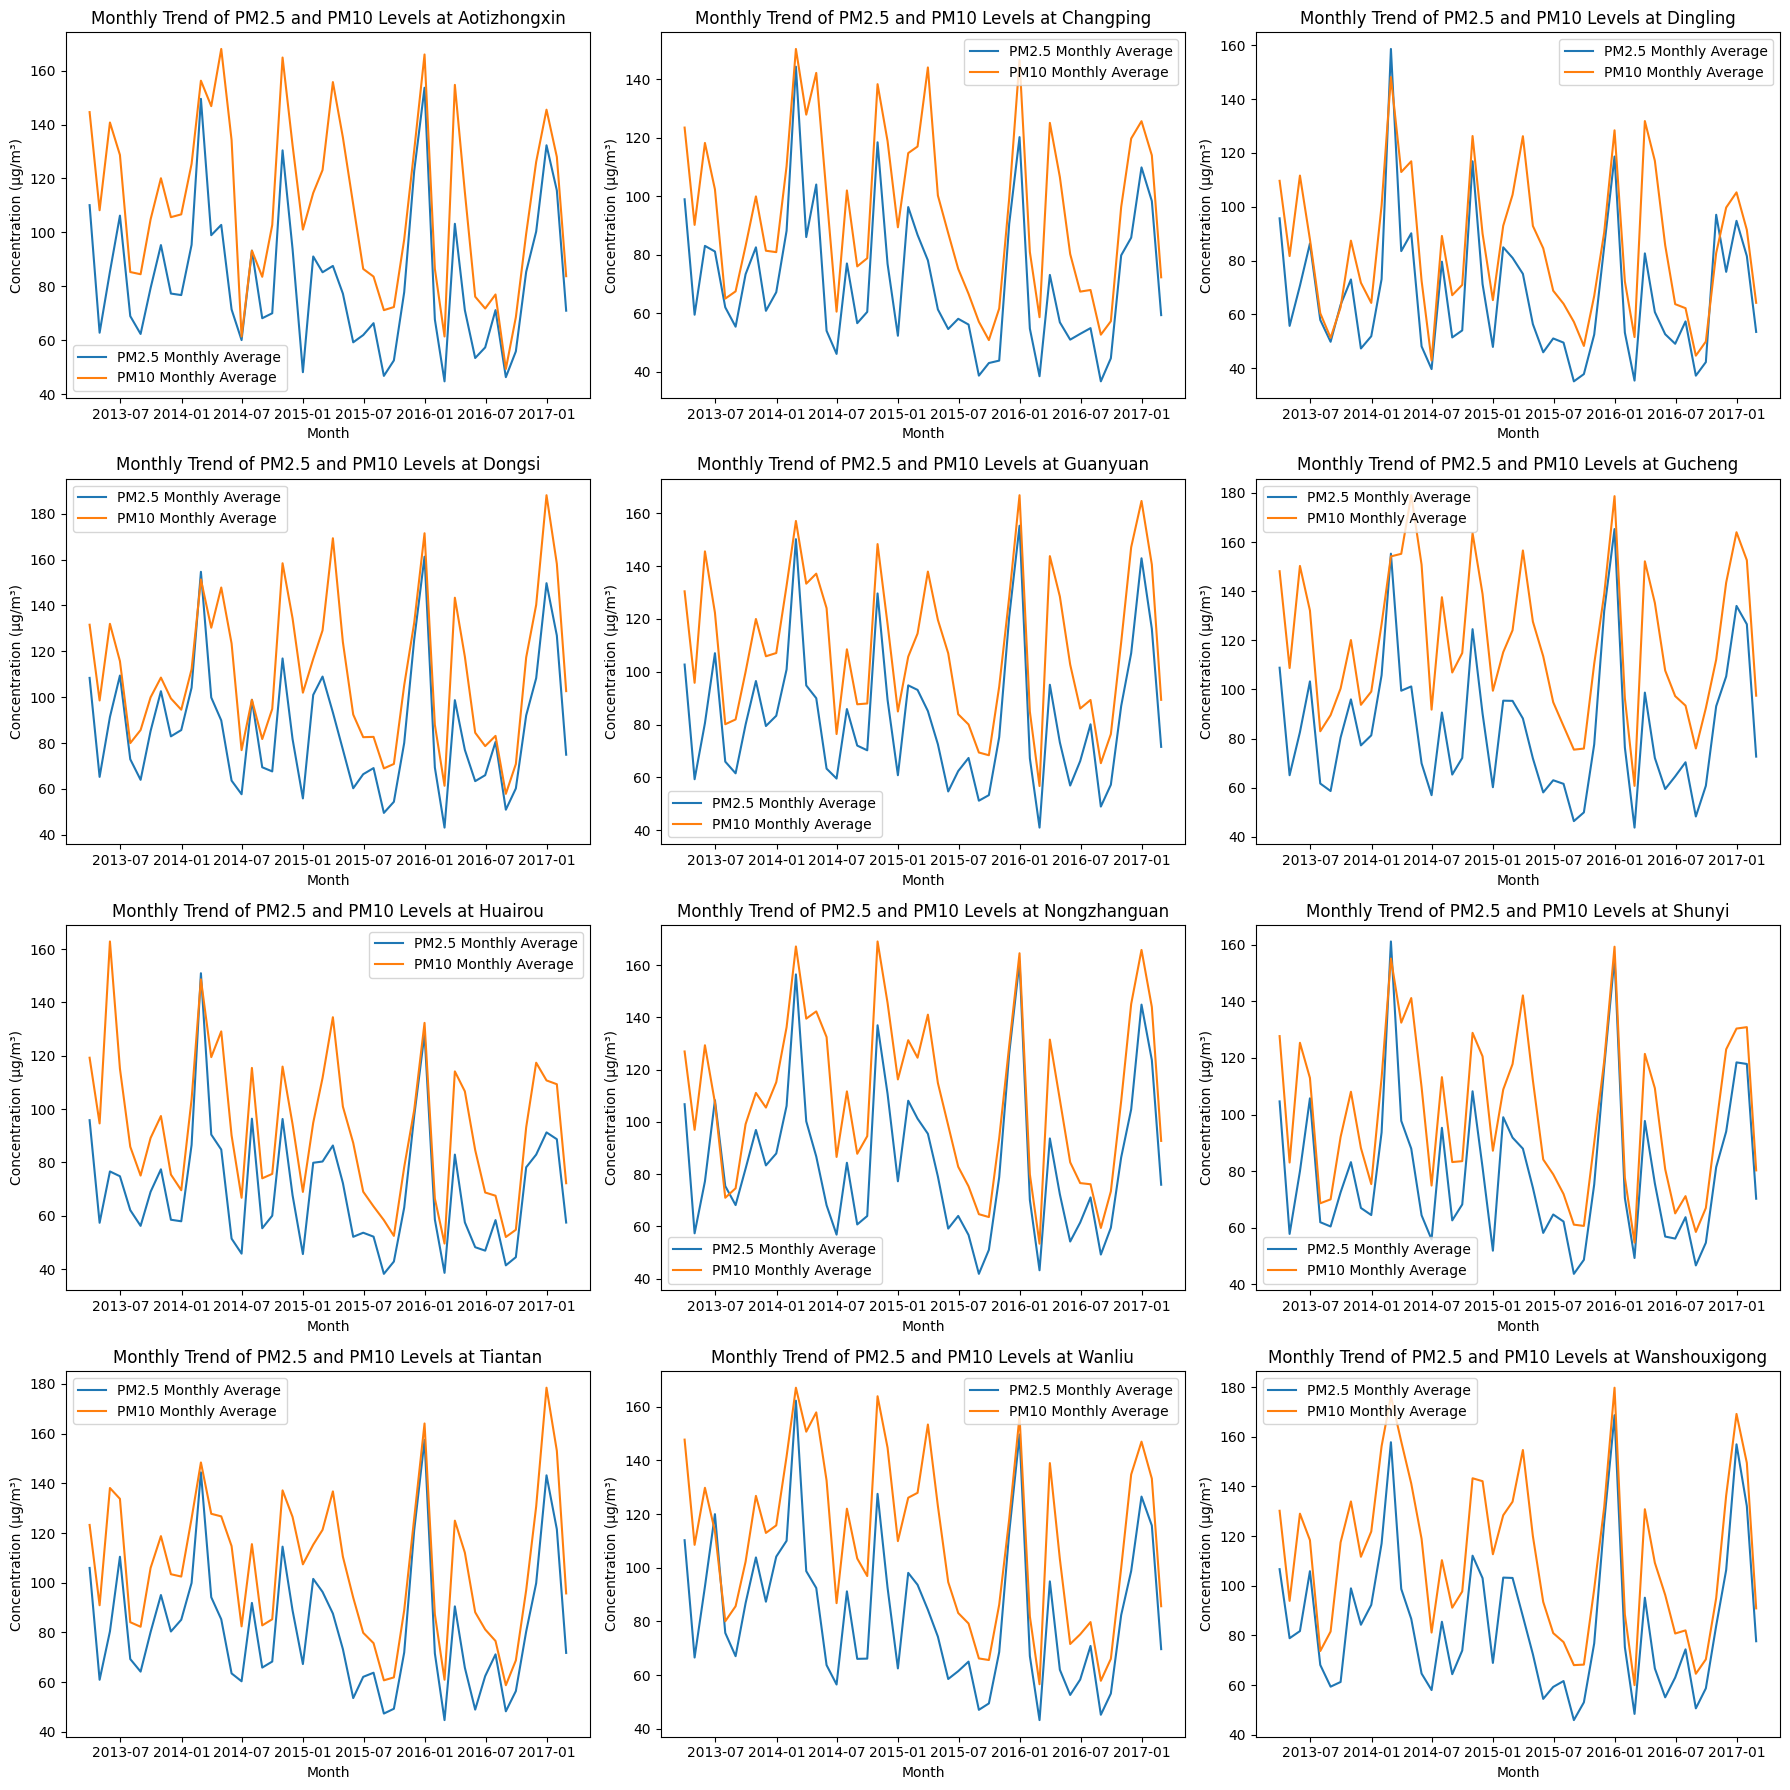

In [65]:
station_names = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng',
                 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

fig, axes = plt.subplots(4, 3, figsize=(18, 18))

for name, ax in zip(station_names, axes.flatten()):
    sns.lineplot(data=monthly_avg_pm25[name], label='PM2.5 Monthly Average', ax=ax)
    sns.lineplot(data=monthly_avg_pm10[name], label='PM10 Monthly Average', ax=ax)
    ax.set_title(f'Monthly Trend of PM2.5 and PM10 Levels at {name}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Concentration (µg/m³)')
    ax.legend()

plt.tight_layout()

plt.show()


### Pertanyaan 2: Bagaimana pengaruh hujanterhadap konsentrasi polutan?

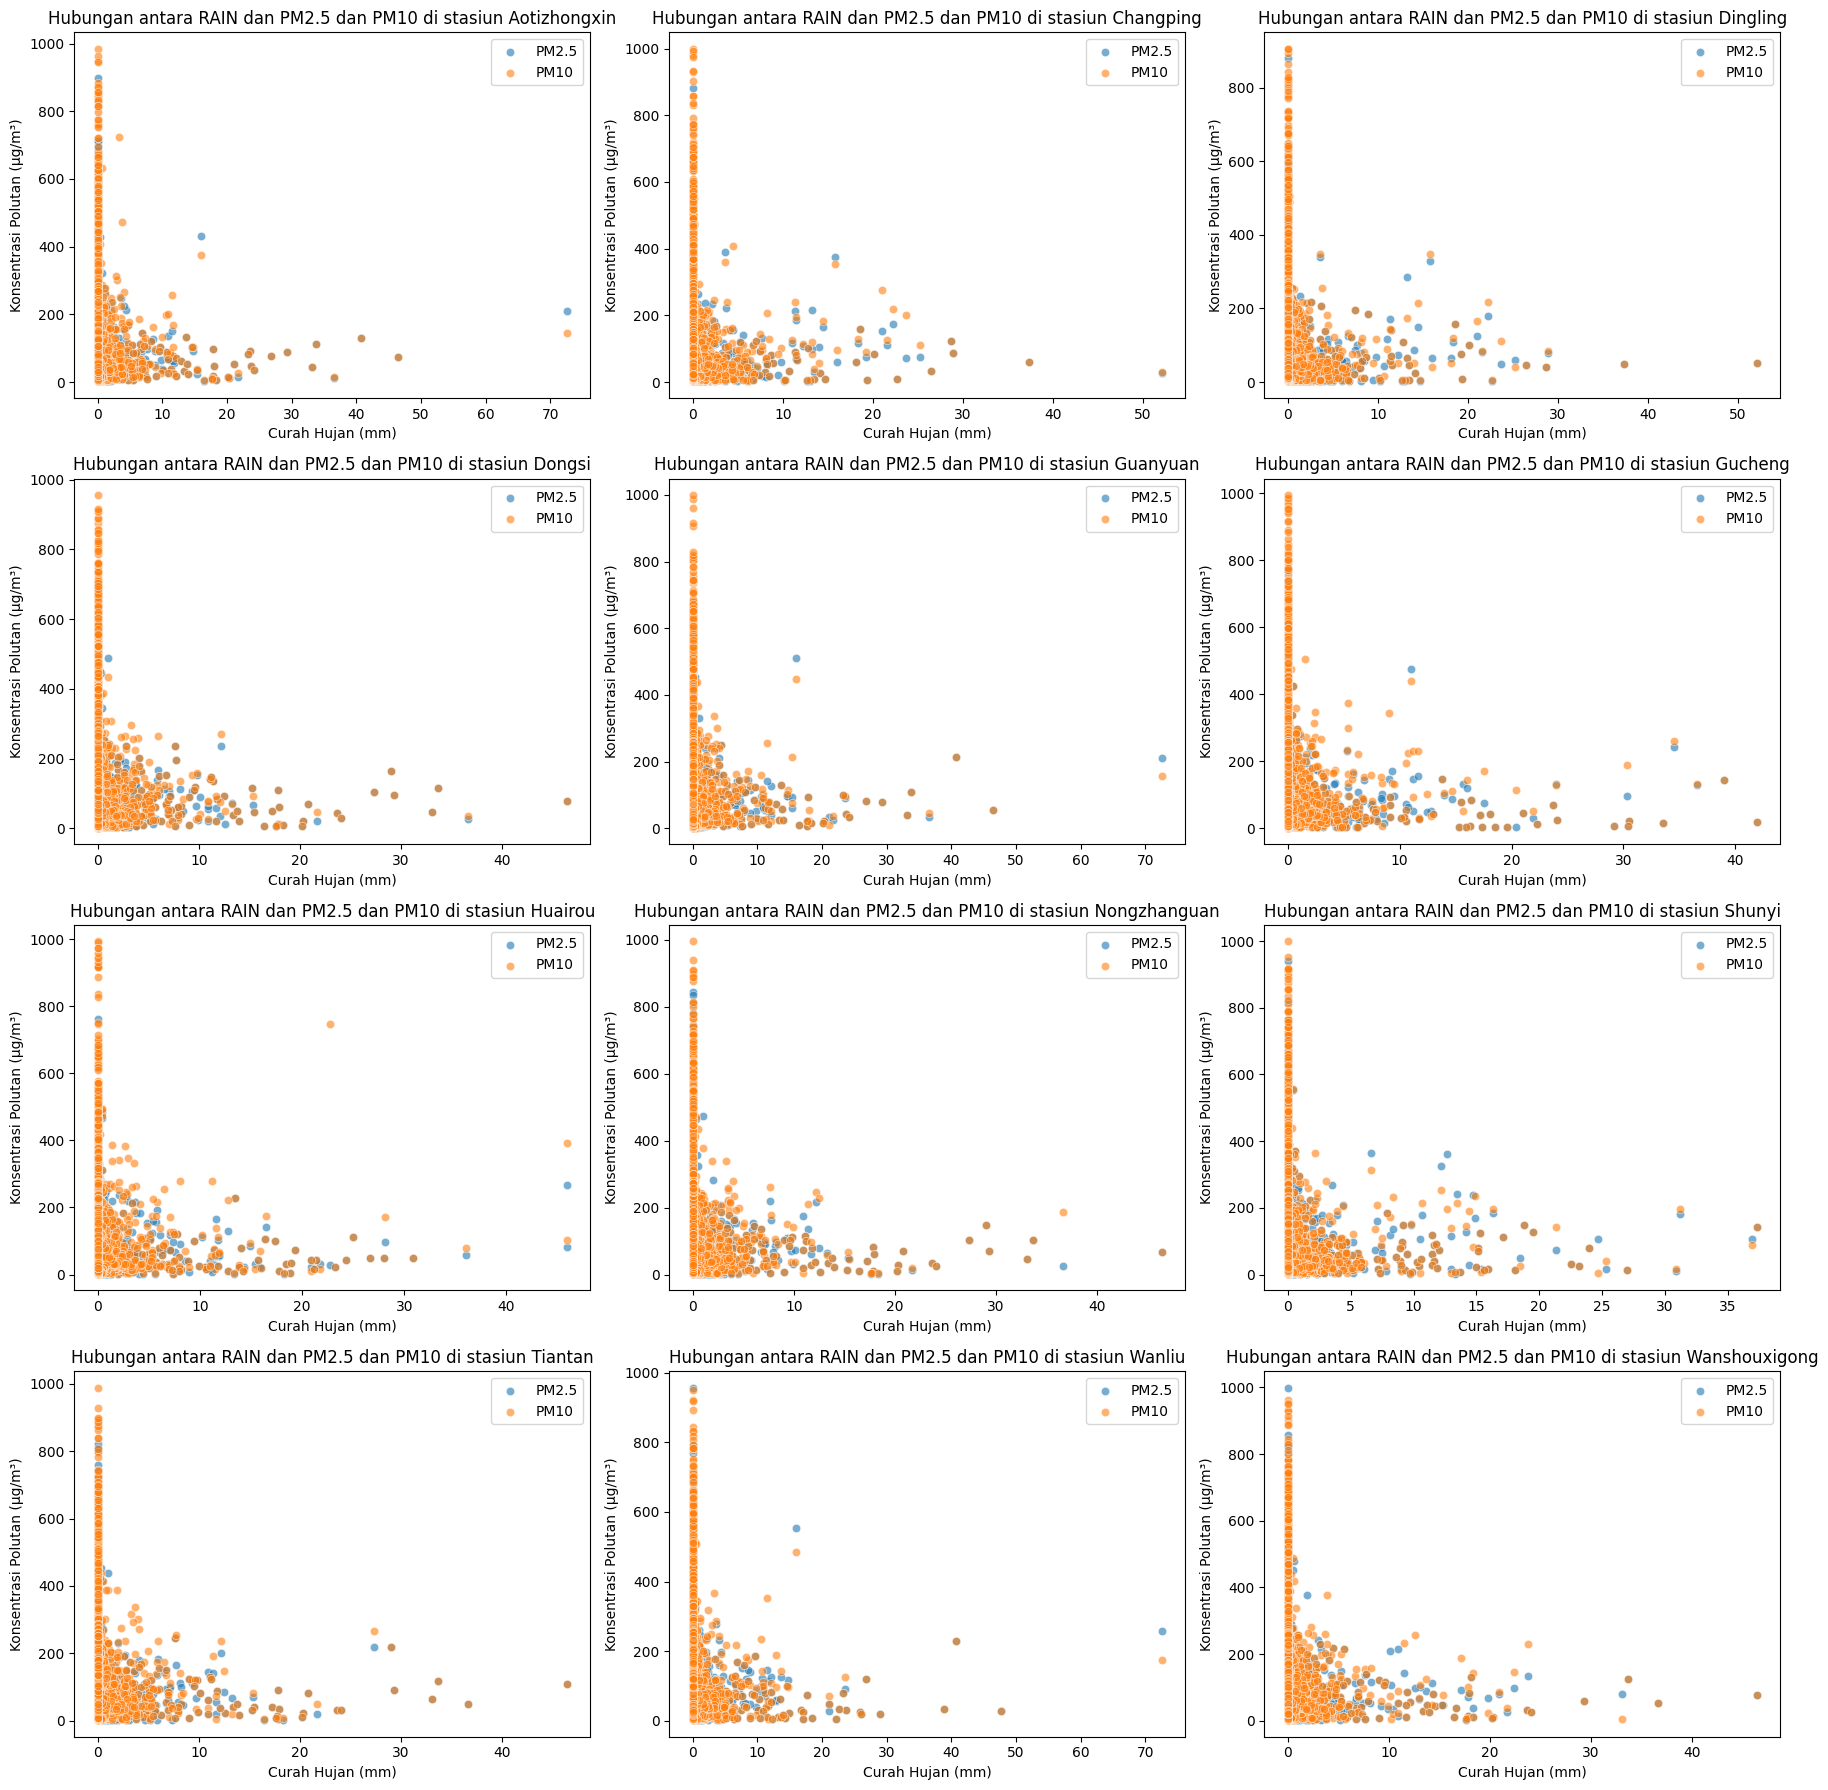

In [66]:
dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
              huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]
station_names = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng',
                 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']

fig, axes = plt.subplots(4, 3, figsize=(18, 18))

for df, name, ax in zip(dataframes, station_names, axes.flatten()):
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

    df.set_index('datetime', inplace=True)

    sns.scatterplot(x='RAIN', y='PM2.5', data=df, alpha=0.6, ax=ax, label='PM2.5')
    sns.scatterplot(x='RAIN', y='PM10', data=df, alpha=0.6, ax=ax, label='PM10')
    ax.set_title(f'Hubungan antara RAIN dan PM2.5 dan PM10 di stasiun {name}')
    ax.set_xlabel('Curah Hujan (mm)')
    ax.set_ylabel('Konsentrasi Polutan (µg/m³)')
    ax.legend()

plt.tight_layout()

plt.show()


### Pertanyaan 3: Apakah ada perbedaan signifikan dalam tingkat polusi antar stasiun pengukuran?

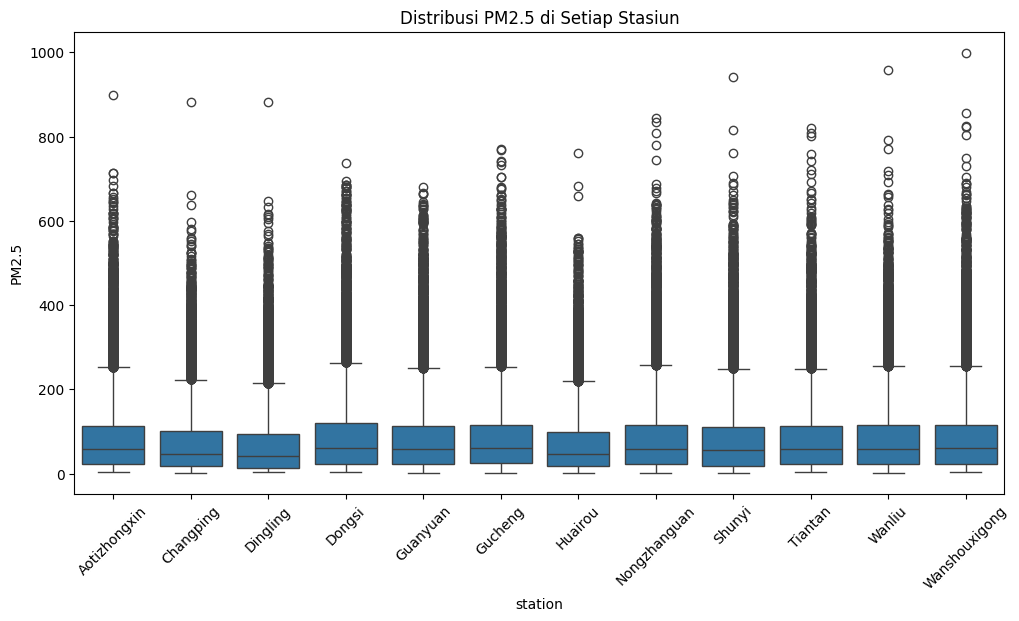

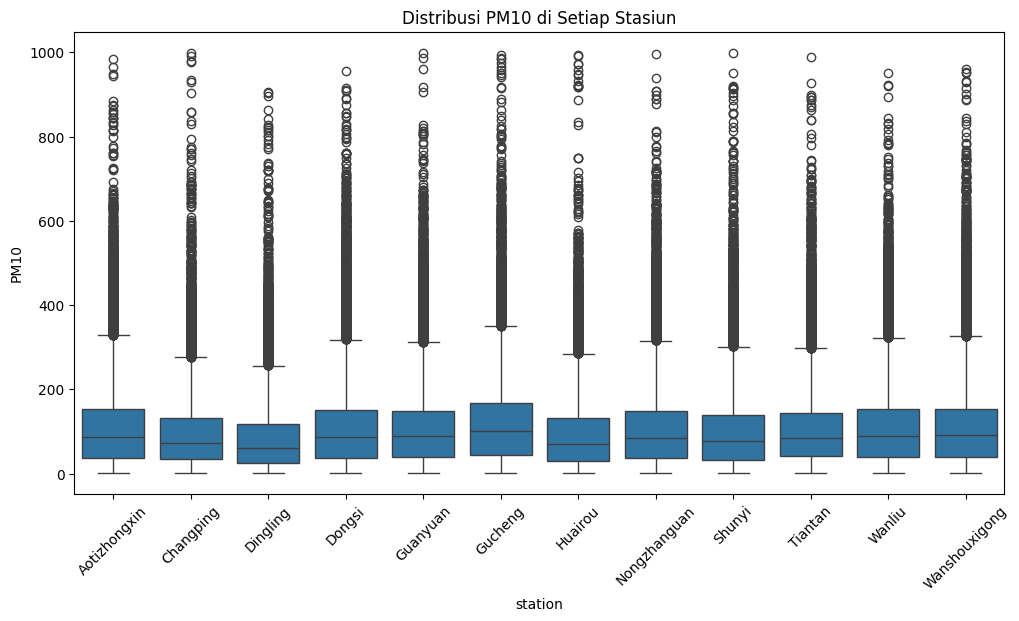

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='PM2.5', data=combined_df)
plt.title('Distribusi PM2.5 di Setiap Stasiun')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='PM10', data=combined_df)
plt.title('Distribusi PM10 di Setiap Stasiun')
plt.xticks(rotation=45)
plt.show()

## Conclusion

- **Bagaimana tren level PM2.5 dan PM10 sepanjang tahun? Apakah ada pola musiman?** <p> Berdasarkan data rata-rata bulanan dan visualisasi yang dibuat, dapat dilihat bahwa ada variasi dalam tingkat polusi PM2.5 dan PM10 sepanjang tahun di setiap stasiun pengukuran.
Secara umum, tingkat polusi PM2.5 dan PM10 cenderung lebih tinggi pada bulan-bulan dingin (November-Februari) dan lebih rendah pada bulan-bulan hangat (Juni-Agustus). Hal ini dapat menunjukkan adanya pola musiman yang dipengaruhi oleh faktor-faktor seperti aktivitas pemanasan, kondisi atmosfer, dan arah angin. Namun, ada juga beberapa pengecualian dan variasi antar stasiun. Misalnya, stasiun Aotizhongxin memiliki tingkat polusi PM2.5 dan PM10 yang relatif tinggi pada bulan April 2014, sementara stasiun Changping memiliki tingkat polusi PM2.5 dan PM10 yang relatif rendah pada bulan Oktober 2015. Hal ini dapat disebabkan oleh faktor-faktor lokal yang spesifik untuk setiap stasiun, seperti lokasi geografis, sumber polusi terdekat, dan kejadian luar biasa seperti kebakaran atau kecelakaan.
Oleh karena itu, dapat disimpulkan bahwa ada tren dan pola musiman dalam tingkat polusi PM2.5 dan PM10 sepanjang tahun, tetapi juga ada variasi dan perbedaan antar stasiun yang perlu diteliti lebih lanjut.
- **Bagaimana pengaruh hujan terhadap konsentrasi polutan?** <p>
Berdasarkan hasil korelasi Spearman dan visualisasi scatter plot yang dibuat, dapat dilihat bahwa ada hubungan yang lemah antara hujan dan konsentrasi polutan PM2.5 dan PM10 di setiap stasiun pengukuran.
Secara umum, hubungan antara hujan dan konsentrasi polutan PM2.5 dan PM10 cenderung negatif, artinya semakin tinggi curah hujan, semakin rendah konsentrasi polutan. Hal ini dapat menunjukkan bahwa hujan berperan sebagai mekanisme pembersihan alami yang mengurangi polusi udara. Namun, hubungan antara hujan dan konsentrasi polutan PM2.5 dan PM10 juga cenderung lemah, artinya tidak ada ketergantungan yang kuat antara variabel-variabel tersebut. Hal ini dapat disebabkan oleh faktor-faktor lain yang juga mempengaruhi konsentrasi polutan, seperti sumber polusi, kondisi atmosfer, dan arah angin. Selain itu, ada juga beberapa variasi antar stasiun. Misalnya, stasiun Dingling memiliki hubungan yang hampir nol antara hujan dan konsentrasi polutan PM2.5, sementara stasiun Gucheng memiliki hubungan yang paling negatif antara hujan dan konsentrasi polutan PM10. Hal ini dapat disebabkan oleh faktor-faktor lokal yang spesifik untuk setiap stasiun, seperti lokasi geografis, sumber polusi terdekat, dan kejadian luar biasa seperti kebakaran atau kecelakaan. Oleh karena itu, dapat disimpulkan bahwa ada hubungan yang lemah dan negatif antara hujan dan konsentrasi polutan PM2.5 dan PM10, tetapi juga ada variasi dan perbedaan antar stasiun yang perlu diteliti lebih lanjut.
- **Apakah ada perbedaan signifikan dalam tingkat polusi antar stasiun pengukuran?** <p>
Berdasarkan hasil ANOVA, dapat dilihat bahwa ada perbedaan signifikan dalam tingkat polusi PM2.5 dan PM10 antar stasiun pengukuran. Nilai p-value untuk kedua polutan adalah 0.0, yang berarti bahwa ada setidaknya satu pasang stasiun yang memiliki tingkat polusi yang berbeda secara signifikan.Untuk mengetahui pasangan stasiun mana yang memiliki perbedaan signifikan, dapat dilakukan uji post-hoc dengan metode Tukey HSD. Hasil uji post-hoc menunjukkan bahwa ada banyak pasangan stasiun yang memiliki perbedaan signifikan dalam tingkat polusi PM2.5 dan PM10, dengan nilai p-adj kurang dari 0.05. Pasangan stasiun yang memiliki perbedaan signifikan ditandai dengan nilai reject True. Secara umum, stasiun-stasiun yang memiliki tingkat polusi PM2.5 dan PM10 yang lebih tinggi adalah Aotizhongxin, Dongsi, Nongzhanguan, dan Wanshouxigong. Stasiun-stasiun yang memiliki tingkat polusi PM2.5 dan PM10 yang lebih rendah adalah Changping, Dingling, Huairou, dan Shunyi. Stasiun-stasiun lain seperti Guanyuan, Gucheng, Tiantan, dan Wanliu memiliki tingkat polusi PM2.5 dan PM10 yang bervariasi tergantung pada stasiun yang dibandingkan. Oleh karena itu, dapat disimpulkan bahwa ada perbedaan signifikan dalam tingkat polusi PM2.5 dan PM10 antar stasiun pengukuran, dan perbedaan tersebut dapat dipengaruhi oleh faktor-faktor seperti lokasi geografis, sumber polusi, kondisi atmosfer, dan arah angin.

## Buat requirements.txt

In [ ]:
!pip install pipreqs


In [ ]:
!pipreqs /content/drive/MyDrive/bangkit


INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/bangkit/requirements.txt


In [ ]:
!cat /content/drive/MyDrive/bangkit/requirements.txt

matplotlib==3.7.1
numpy==1.25.2
pandas==1.5.3
scipy==1.12.0
seaborn==0.13.2
statsmodels==0.14.1


## Buat main_data.csv

In [68]:
dataframes = [aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df,
              huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, wanshouxigong_df]

main_data = pd.concat(dataframes, ignore_index=True)

main_data.to_csv('main_data.csv', index=False)
